# Investigate mixing processes in accretor models
author: [Mathieu Renzo](mailto:mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
%matplotlib inline
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [2]:
set_plotDefaults()

done in plotDefaults.py


In [3]:
# root folder for best model
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/exponential_ov/"
binary = folder+"/binary_to_donor_Hedepl/"
accretor = folder+"/accretor_to_TAMS/"
dhfile = binary+"/LOGS1/history.data"
hfile1 = binary+'/LOGS2/history.data'
hfile2 = accretor+'/LOGS/history.data'
bfile = binary+'/binary_history.data'
model_name = folder.split('/')[-2].replace('_','\_')
print(model_name)

# folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
# binary = folder+"binary_to_postRLOF/"
# dhfile = binary+"/LOGS1/history.data"
# hfile1 = binary+'/LOGS2/history.data'
LOGS2 = binary+'/LOGS2/'

exponential\_ov


In [4]:
def get_age_from_profile(pfile):
    # print(pfile)
    with open(pfile, 'r') as f:
        for i, line in enumerate(f):
            if i == 1:
                header_cols = line.split()
                # print(header_cols)
            if i == 2:
                header_data = line.split()
                break
    age = float(header_data[header_cols.index('star_age')])*1e-6
    return age # in Myr


def get_modnum_from_profile(pfile):
    # print(pfile)
    with open(pfile, 'r') as f:
        for i, line in enumerate(f):
            if i == 1:
                header_cols = line.split()
                # print(header_cols)
            if i == 2:
                header_data = line.split()
                break
    mn = int(header_data[header_cols.index('model_number')])
    return mn # in yr

def get_ZAMS_abundances(hfile):
    src, col = getSrcCol(hfile)
    surface_c12 = src[0, col.index("surface_c12")]
    surface_n14 = src[0, col.index("surface_n14")]
    surface_o16 = src[0, col.index("surface_o16")]
    return surface_c12, surface_n14, surface_o16    

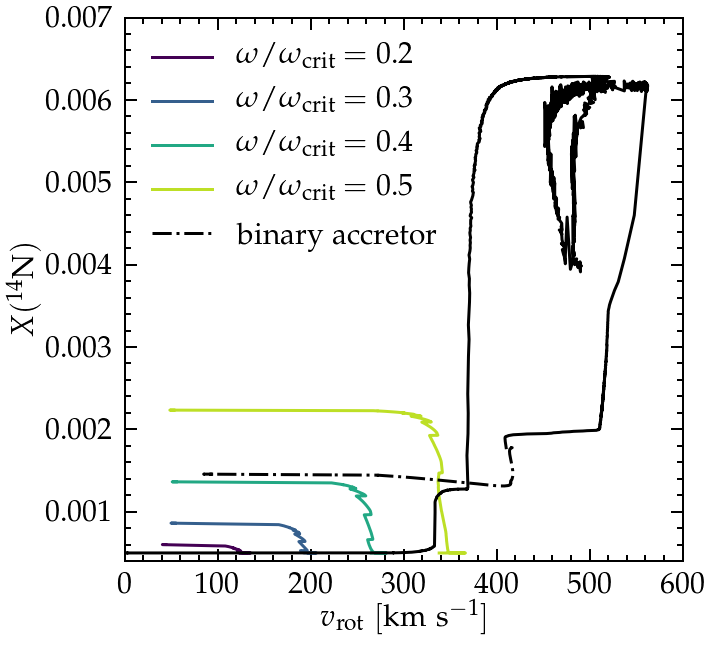

In [97]:
# unter diagram

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 155)

ax = fig.add_subplot(gs[:, :])
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax.set_xlabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")

folders = [
    # "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/non_rot/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

colors = plt.cm.viridis(np.linspace(0,0.9,len(folders)-1))
# ax.set_ylim(ymax=9e-3, ymin=4e-4)
ax.set_ylim(ymax=7e-3, ymin=4e-4)
ax.set_xlim(0, 600)    

for folder in folders:
    if "single" in folder:
        label = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        c = colors[folders.index(folder)] 
        src, col = getSrcCol(folder+"/history.data")
        n14 = src[:, col.index("surface_n14")]
        vrot = src[:, col.index("surf_avg_v_rot")]
        ax.plot(vrot, n14, c=c, label=label)
    if "binary" in folder:
        label = "$\mathrm{binary\ accretor}$"
        c = 'k'
        src, col = getSrcCol(folder+"/history.data")
        n14_1 = src[:, col.index("surface_n14")]
        vrot_1 = src[:, col.index("surf_avg_v_rot")]
        ax.plot(vrot_1, n14_1, c=c)
        # src, col = getSrcCol(folder+"../binary_history.data")
        # rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
        # ind = rl_relative_gap_1 > 0
        # ax.plot(vrot_1[ind], n14_1[ind], c='r', ms=10, zorder=100)
        # now plot post-RLOF
        src, col = getSrcCol(folder+"/../../accretor_to_TAMS/LOGS/history.data")
        n14_2 = src[:, col.index("surface_n14")]
        vrot_2 = src[:, col.index("surf_avg_v_rot")]       
        ax.plot(vrot_2, n14_2, c=c,ls='-.', label=label)

        
# n, err_n =  get_zeta_oph_surface_n()
# ax.axhline(n, 0,1,c='r', lw=2)
# xmin, xmax = ax.get_xlim()
# x = np.linspace(xmin, xmax, 3)
# ax.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2)

ax.legend()
# ax.set_yscale('log')
# plt.savefig("/mnt/home/mrenzo/TMP/hunter_zeta.pdf")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


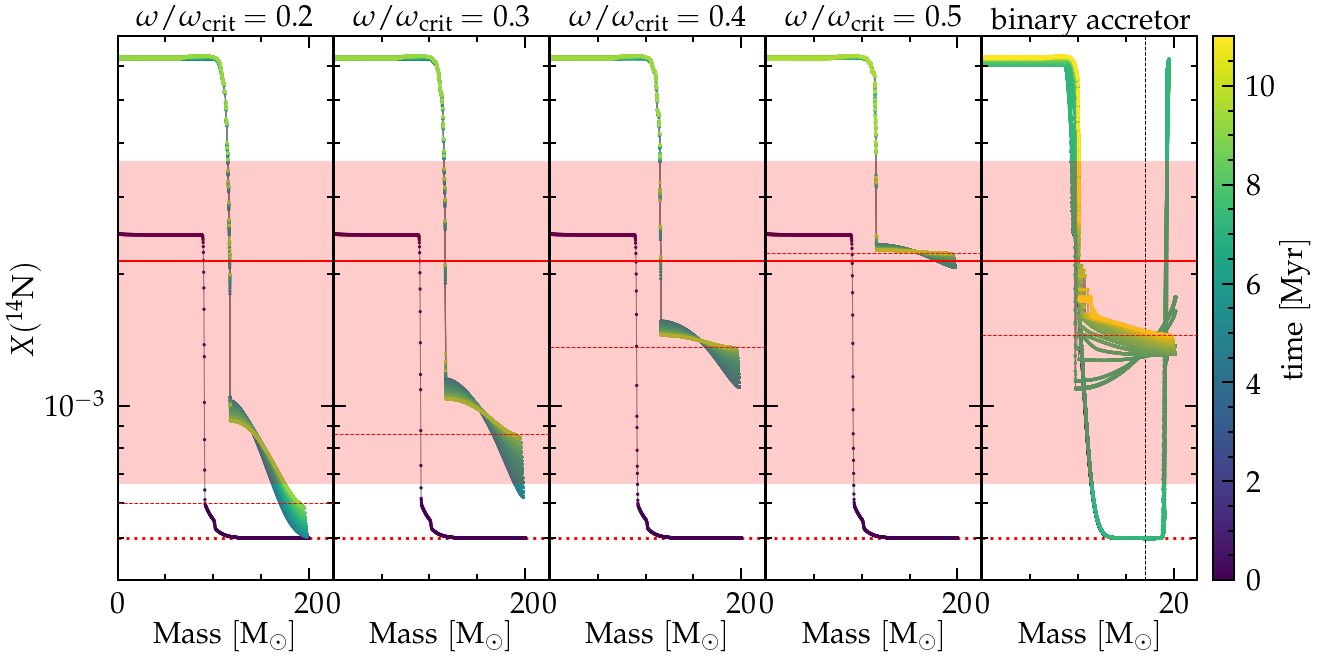

In [50]:
# n14 only
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:, :30])
ax2 = fig.add_subplot(gs[:, 30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])
cax = fig.add_subplot(gs[:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
ax1.set_ylabel(r"$X(^{14}\mathrm{N})$")

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=7e-3, ymin=4e-4)
    # ax.set_facecolor('#d8d8d8')
    ax.set_xlim(xmin=0, xmax=22.5)
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])




folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS_old/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS_old/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[::5]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        profiles = sorted(glob.glob(folder+"/p*data")+glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        # profiles = profiles[::5]+[profiles[-1]]
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        n = src[:, col.index("n14")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, n, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11)
        if profile == profiles[-1]:
            ax.axhline(n[0],0,1, ls='--', lw=1, c='r', zorder=100)
    c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
    ax.axhline(n14zams, 0,1, ls=':', c='r', zorder=0)
    n, err_n =  get_zeta_oph_surface_n()
    ax.axhline(n, 0,1,c='r', lw=2)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    ax.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2)

    
fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/TMP/n14_struct_complete_zeta_ab.pdf")
# plt.savefig("/mnt/home/mrenzo/TMP/n14_struct_complete.pdf")

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:145: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


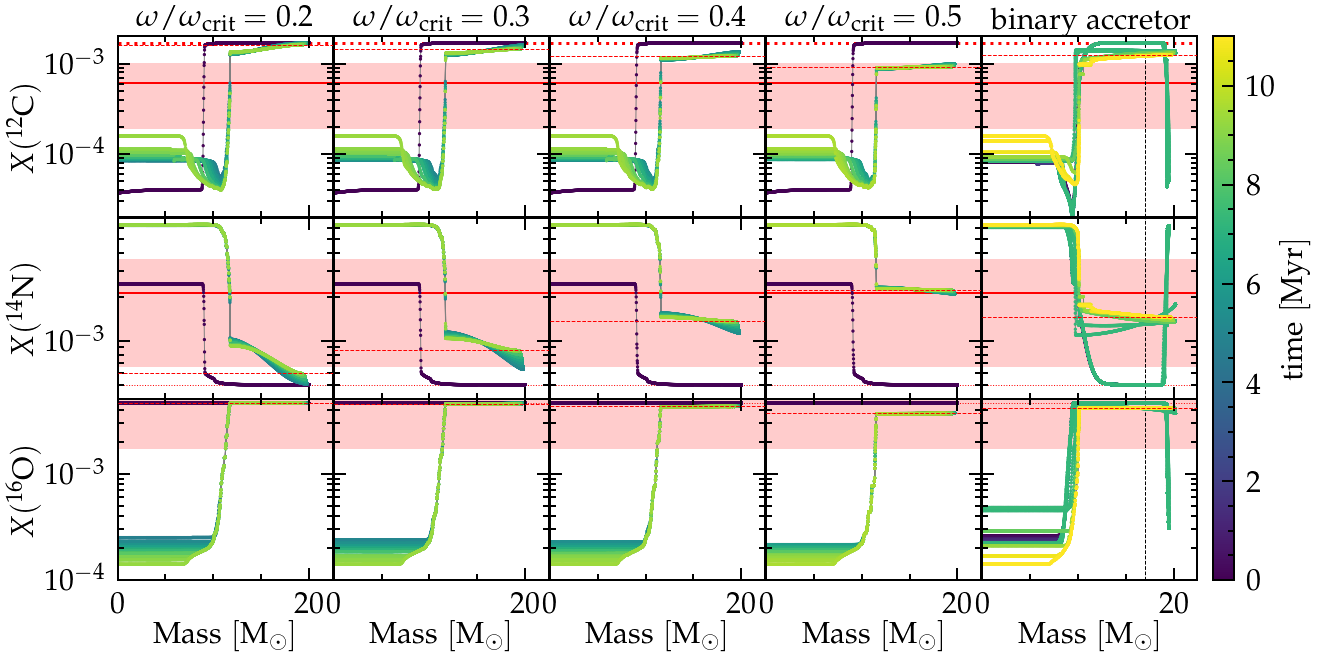

In [81]:
# all rot rate and abundances
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:40, :30])
ax2 = fig.add_subplot(gs[:40, 30:60])
ax3 = fig.add_subplot(gs[:40, 60:90])
ax4 = fig.add_subplot(gs[:40, 90:120])
ax5 = fig.add_subplot(gs[:40, 120:150])

bx1 = fig.add_subplot(gs[40:80, :30])
bx2 = fig.add_subplot(gs[40:80, 30:60])
bx3 = fig.add_subplot(gs[40:80, 60:90])
bx4 = fig.add_subplot(gs[40:80, 90:120])
bx5 = fig.add_subplot(gs[40:80, 120:150])

cx1 = fig.add_subplot(gs[80:120, :30])
cx2 = fig.add_subplot(gs[80:120, 30:60])
cx3 = fig.add_subplot(gs[80:120, 60:90])
cx4 = fig.add_subplot(gs[80:120, 90:120])
cx5 = fig.add_subplot(gs[80:120, 120:150])

cax = fig.add_subplot(gs[:, 152:])

axes = [ax1, ax2, ax3, ax4, ax5]
bxes = [bx1, bx2, bx3, bx4, bx5]
cxes = [cx1, cx2, cx3, cx4, cx5]


ax1.set_ylabel(r"$X(^{12}\mathrm{C})$")
bx1.set_ylabel(r"$X(^{14}\mathrm{N})$")
cx1.set_ylabel(r"$X(^{16}\mathrm{O})$")

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=2e-3, ymin=2e-5)
    ax.set_xlim(xmin=0, xmax=22.5)
    # add observed abundances
    c, err_c =  get_zeta_oph_surface_c()
    ax.axhline(c, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax,3)
    ax.fill_between(x, y1=c-err_c, y2=c+err_c, fc='r',alpha=0.2, zorder=0)   
for bx in bxes:
    bx.set_yscale('log')
    bx.set_ylim(ymax=7e-3, ymin=4e-4)
    # bx.set_facecolor('#d8d8d8')
    bx.set_xlim(xmin=0, xmax=22.5)
    # add observed abundances
    n, err_n =  get_zeta_oph_surface_n()
    bx.axhline(n, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = bx.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    bx.fill_between(x, y1=n-err_n, y2=n+err_n, fc='r',alpha=0.2, zorder=0)
for cx in cxes:
    cx.set_yscale('log')
    cx.set_ylim(ymax=5e-3, ymin=1e-4)
    cx.set_xlim(xmin=0, xmax=22.5)
    cx.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    # add observed abundances
    o, err_o =  get_zeta_oph_surface_o()
    cx.axhline(o, 0,1,c='r', lw=2, zorder=0)
    xmin, xmax = cx.get_xlim()
    x = np.linspace(xmin, xmax, 3)
    cx.fill_between(x, y1=o-err_o, y2=o+err_o, fc='r',alpha=0.2, zorder=0)

    
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])

bx2.set_yticklabels([])
bx3.set_yticklabels([])
bx4.set_yticklabels([])
bx5.set_yticklabels([])

cx2.set_yticklabels([])
cx3.set_yticklabels([])
cx4.set_yticklabels([])
cx5.set_yticklabels([])

ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])

bx1.set_xticklabels([])
bx2.set_xticklabels([])
bx3.set_xticklabels([])
bx4.set_xticklabels([])
bx5.set_xticklabels([])

folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS_old/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS_old/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]

for folder in folders:
    ax = axes[folders.index(folder)]
    bx = bxes[folders.index(folder)]
    cx = cxes[folders.index(folder)]
    
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[::10]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        bx.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        cx.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        profiles = sorted(glob.glob(folder+"/p*data")+glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        profiles = profiles[::5]+[profiles[-1]]
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        c = src[:, col.index("c12")]
        n = src[:, col.index("n14")]
        o = src[:, col.index("o16")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, c, c='#808080', lw=1, zorder=0)
        bx.plot(m, n, c='#808080', lw=1, zorder=0)
        cx.plot(m, o, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m,c, c=[age]*len(n), s=5, vmin=0, vmax=11)
        p = bx.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11)
        p = cx.scatter(m,o, c=[age]*len(n), s=5, vmin=0, vmax=11)
        if profile == profiles[-1]:
            ax.axhline(c[0],0,1, ls='--', lw=1, c='r', zorder=100)
            bx.axhline(n[0],0,1, ls='--', lw=1, c='r', zorder=100)
            cx.axhline(o[0],0,1, ls='--', lw=1, c='r', zorder=100)
    c12zams, n14zams, o16zams = get_ZAMS_abundances(folder+'history.data')
    ax.axhline(c12zams, 0,1, ls=':', c='r', zorder=0)
    bx.axhline(n14zams, 0,1, ls=':', lw=1, c='r', zorder=0)
    cx.axhline(o16zams, 0,1, ls=':', lw=1, c='r', zorder=0)

    
fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/TMP/huge_composition.pdf", dpi=10)

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


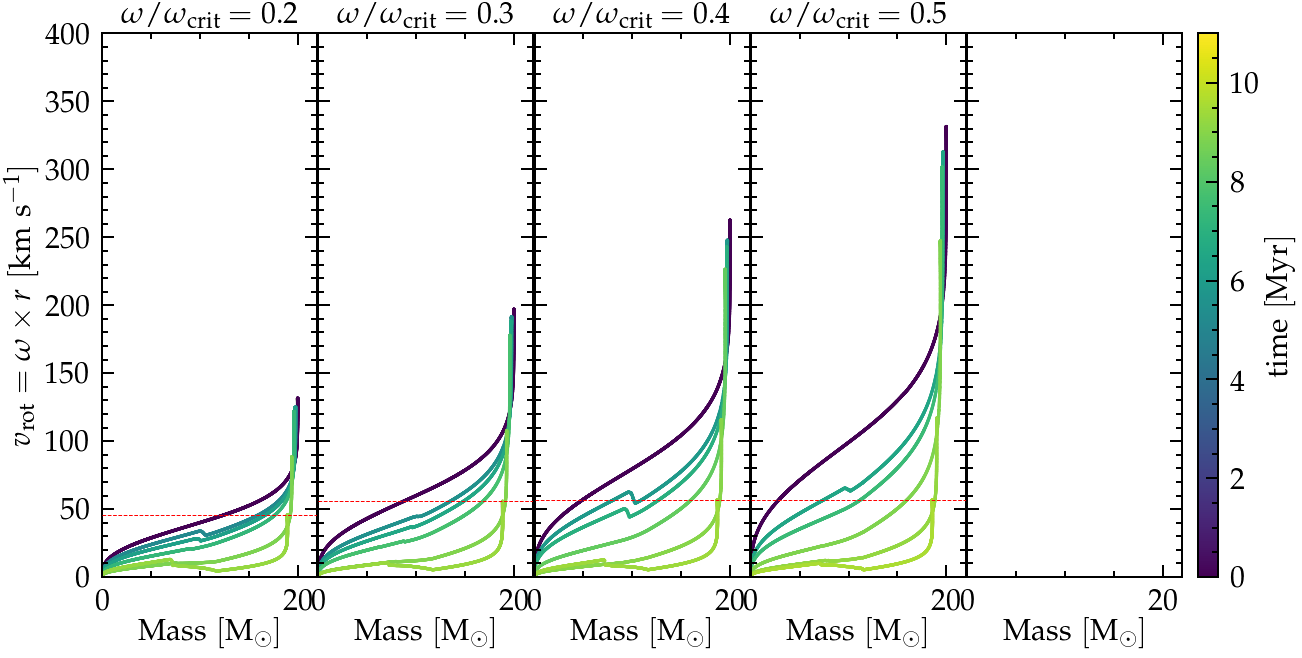

In [86]:
# internal rotation rate
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(120, 155)

ax1 = fig.add_subplot(gs[:,:30])
ax2 = fig.add_subplot(gs[:,30:60])
ax3 = fig.add_subplot(gs[:, 60:90])
ax4 = fig.add_subplot(gs[:, 90:120])
ax5 = fig.add_subplot(gs[:, 120:150])

cax = fig.add_subplot(gs[:, 152:])

ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax4.set_yticklabels([])
ax5.set_yticklabels([])


folders = [
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.2_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.3_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/",
    "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.5_crit/LOGS/",
    # "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/binary_to_postRLOF/LOGS2/"]
]
axes = [ax1,ax2,ax3,ax4, ax5]

for ax in axes:
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    ax.set_ylim(0, 400)
    ax.set_xlim(xmin=0, xmax=22)
# ax1.set_ylabel(r"$\omega \ \mathrm{[rad\ s^{-1}]}$")
ax1.set_ylabel(r"$v_\mathrm{rot} = \omega\times r \ \mathrm{[km\ s^{-1}]}$")


for folder in folders:
    ax = axes[folders.index(folder)]
    if "single" in folder:
        title = "$\omega/\omega_\mathrm{crit}="+str(folder.split('/')[-3].split('_')[1])+"$"
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
        profiles = profiles[::20]+[profiles[-1]]
    if "binary" in folder:
        title = "$\mathrm{binary\ accretor}$"
        ax.axvline(17,0,1, ls="--", c='k', lw=1, zorder=0)
        profiles = sorted(glob.glob(folder+"/p*data")+glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
        profiles = profiles[::5]+[profiles[-1]]
    ax.set_title(title, fontsize=30)
    for profile in profiles:
        src, col = getSrcCol(profile)
        m = src[:, col.index("mass")]
        omega = src[:, col.index("omega")]
        r = src[:, col.index("radius")]*Rsun_cm/1e5 # km
        vrot = omega*r
        age = get_age_from_profile(profile)
        ax.plot(m, vrot, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m, vrot, c=[age]*len(m), s=5, vmin=0, vmax=11)
        if profile == profiles[-1]:
            ax.axhline(vrot[0],0,1, ls='--', lw=1, c='r', zorder=100)
            
            
fig.colorbar(p, cax=cax)
cax.set_ylabel(r"$\mathrm{time \ [Myr]}$")

plt.savefig("/mnt/home/mrenzo/TMP/zeta_Rotational_struct_rot_0_5.pdf", dpi=10)

# diffusion coefficients across the evolution

In [ ]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/re-run_exponential/"
LOGS = root+"binary_to_postRLOF/LOGS2/"
LOGS_single = root+"accretor_to_TAMS/LOGS/" 
profiles =  [LOGS+'/profile31.data',  # model_number = 1500
             LOGS+'/profile81.data',  # model_number = 4000
             LOGS+'/profile111.data', # model_number = 5500
             LOGS_single+'/'
]

# sanity checks

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


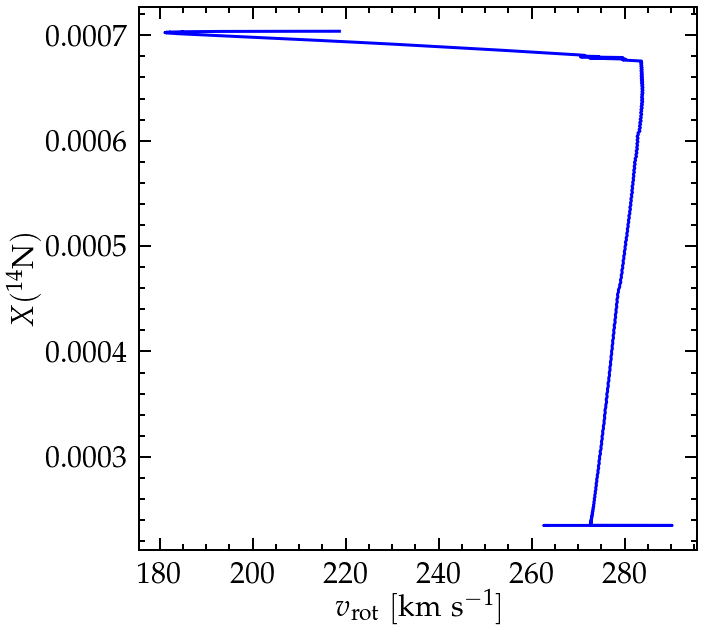

In [ ]:
# Hunter diagram for 13Msun Z=Z_LMC=0.0047
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.0047/13/rot_0.4_crit/LOGS/"

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 155)

ax = fig.add_subplot(gs[:, :])
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")
ax.set_xlabel(r"$v_\mathrm{rot} \ \mathrm{[km\ s^{-1}]}$")


src, col = getSrcCol(folder+"/history.data")
n14 = src[:, col.index("surface_n14")]
vrot = src[:, col.index("surf_avg_v_rot")]


label = "13Msun, Z=0.0047"
ax.plot(vrot, n14, c='b', label=label)
    

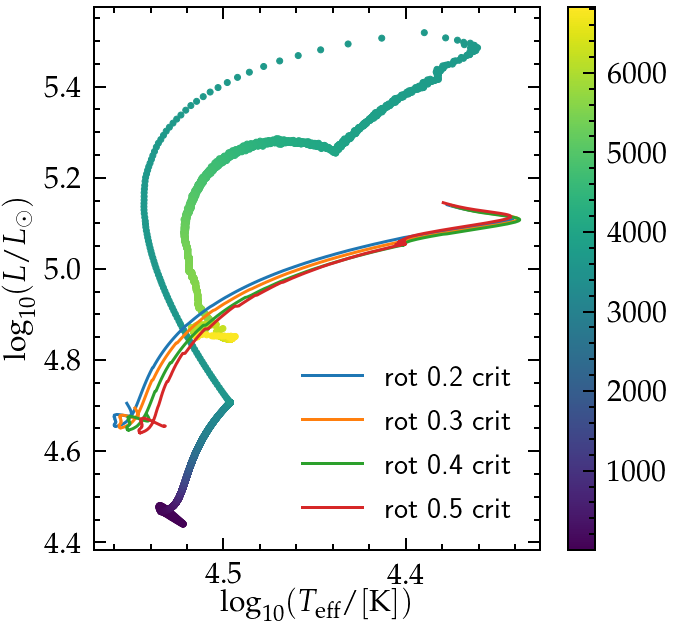

In [ ]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(120, 120)
ax = fig.add_subplot(gs[:,:])

for folder in folders:
    hfile = folder+'history.data'
    src, col = getSrcCol(hfile)
    L = src[:, col.index("log_L")]
    Teff = src[:, col.index("log_Teff")]
    mn = src[:, col.index("model_number")]
    if "binary" not in folder:
        ax.plot(Teff, L, label=folder.split('/')[-3].replace('_',' '))
    else:
        p = ax.scatter(Teff, L, c=mn)
fig.colorbar(p)
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/\mathrm{[K]})$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")
ax.legend()

# ===============================================================================

['line', 'time', 'mass', 'lg(L)', 'lg(Teff)', '1H_surf', '4He_surf', '12C_surf', '13C_surf', '14N_surf', '16O_surf', '17O_surf', '18O_surf', '20Ne_surf', '22Ne_surf', '26Al_surf', 'Mcc/Mt', 'lg(Teff)', 'lg(Md)', 'lg(rhoc)', 'lg(Tc)', '1H_cen', '4He_cen', '12C_cen', '13C_cen', '14N_cen', '16O_cen', '17O_cen', '18O_cen', '20Ne_cen', '22Ne_cen', '26Al_cen', 'Omeg_surf', 'Omeg_cen', 'Rp/Req', 'Md/Md(0)', 'v_crit1', 'v_crit2', 'v_equa', 'Om/Om_cr', 'Gamma_Ed', 'lg(Mdot_mech)', 'L_tot']
['line', 'time', 'mass', 'lg(L)', 'lg(Teff)', '1H_surf', '4He_surf', '12C_surf', '13C_surf', '14N_surf', '16O_surf', '17O_surf', '18O_surf', '20Ne_surf', '22Ne_surf', '26Al_surf', 'Mcc/Mt', 'lg(Teff)', 'lg(Md)', 'lg(rhoc)', 'lg(Tc)', '1H_cen', '4He_cen', '12C_cen', '13C_cen', '14N_cen', '16O_cen', '17O_cen', '18O_cen', '20Ne_cen', '22Ne_cen', '26Al_cen', 'Omeg_surf', 'Omeg_cen', 'Rp/Req', 'Md/Md(0)', 'v_crit1', 'v_crit2', 'v_equa', 'Om/Om_cr', 'Gamma_Ed', 'lg(Mdot_mech)', 'L_tot']


Text(0, 0.5, '$\\log_{10}(X(^{14}\\mathrm{N})/X(^{12}\\mathrm{C}))$')

/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)
/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


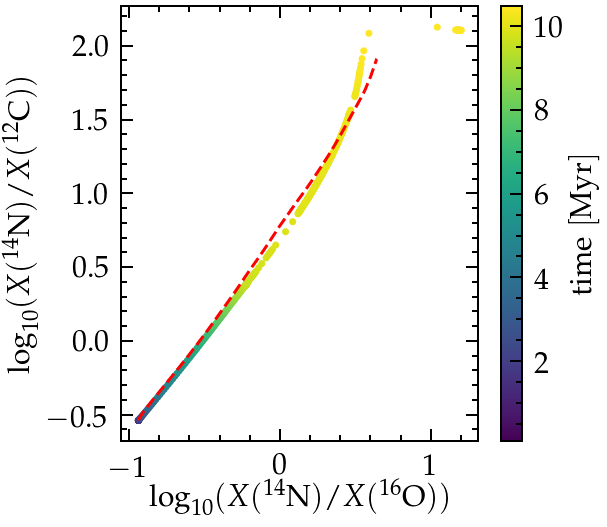

In [4]:
# play with Geneva model
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


file_geneva = "../data/geneva_models/M020Z14V4.dat"
src = np.genfromtxt(file_geneva, skip_header=2)
with open(file_geneva, "r") as f:
    for i, line in enumerate(f):
        if i==0:
            col = line.split()
            print(col)
        break
c12_surf = src[:, col.index('12C_surf')]
n14_surf = src[:, col.index('14N_surf')]
o16_surf = src[:, col.index('16O_surf')]
t = src[:, col.index('time')]*1e-6


x = np.log10(n14_surf/o16_surf)
y = np.log10(n14_surf/c12_surf)

p = ax.scatter(x, y, c=t)


# now non-rotating
file_geneva = "../data/geneva_models/M020Z14V0.dat"
src = np.genfromtxt(file_geneva, skip_header=2)
with open(file_geneva, "r") as f:
    for i, line in enumerate(f):
        if i==0:
            col = line.split()
            print(col)
        break
c12_surf = src[:, col.index('12C_surf')]
n14_surf = src[:, col.index('14N_surf')]
o16_surf = src[:, col.index('16O_surf')]
t = src[:, col.index('time')]*1e-6

x = np.log10(n14_surf/o16_surf)
y = np.log10(n14_surf/c12_surf)

# ax.scatter(x, y, label="20, 0 geneva", c=t)
ax.plot(x, y, c='r', ls='--')
fig.colorbar(p, label="$\mathrm{time\ [Myr]}$")
ax.set_xlabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{16}\mathrm{O}))$")
ax.set_ylabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{12}\mathrm{C}))$")

(0, 3)

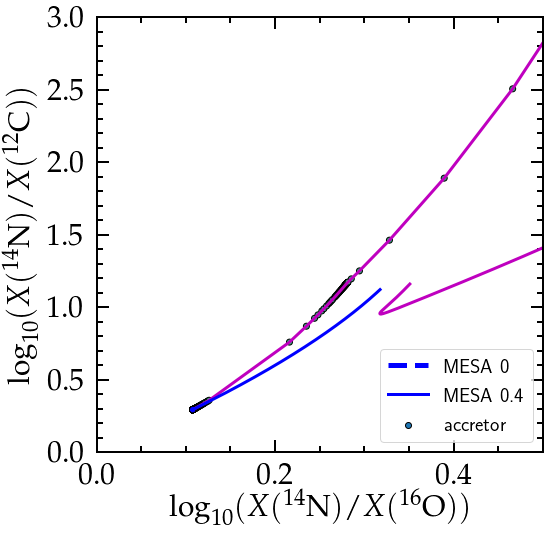

In [10]:
# surface abundances evolution
# inspired by Fig. 8 in Bouret et al. 2021
# but we use mass fractions not number fractions
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

src1, col1 = getSrcCol(hfile1)
src2, col2 = getSrcCol(hfile2)

mass = np.concatenate((src1[:, col1.index("star_mass")], src2[:, col2.index("star_mass")]))
time = np.concatenate((src1[:, col1.index("star_age")], src2[:, col2.index("star_age")]))*1e-6

src, col = getSrcCol(bfile)
rl_relative_gap_1 = src[:, col.index("rl_relative_overflow_1")]
ind = rl_relative_gap_1 > 0
t_RLOF = src[ind, col.index("age")]*1e-6
RLOF_init = min(t_RLOF)
RLOF_end = max(t_RLOF)

# get surface CNO mass fraction
surface_n14 = np.concatenate((src1[:, col1.index("surface_n14")], src2[:, col2.index("surface_n14")]))
surface_c12 = np.concatenate((src1[:, col1.index("surface_c12")], src2[:, col2.index("surface_c12")]))
surface_o16 = np.concatenate((src1[:, col1.index("surface_o16")], src2[:, col2.index("surface_o16")]))
# surface_h = np.concatenate((src1[:, col1.index("surface_h1")], src2[:, col2.index("surface_h1")]))

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='m')
ax.scatter(10**log_N_div_O[(time>RLOF_init) & (time< RLOF_end)], 10**log_N_div_C[(time>RLOF_init) & (time< RLOF_end)],c=time[(time>RLOF_init) & (time< RLOF_end)], edgecolor='k',label=r"accretor", vmin=0, vmax=max(time))

# add zeta Ophiuchi
c, err_c = get_zeta_oph_surface_c()
o, err_o = get_zeta_oph_surface_o()
n, err_n =  get_zeta_oph_surface_n()

n_div_c = n/c
err_n_div_c = (err_n/n +err_c/c)*n_div_c
log_n_div_c = np.log10(n_div_c)
err_log_n_div_c = err_n_div_c/(n_div_c*np.log(10))



n_div_o = n/o
err_n_div_o = (err_n/n +err_o/o)*n_div_o
log_n_div_o = np.log10(n_div_o)
err_log_n_div_o = err_n_div_o/(n_div_o*np.log(10))

#ax.errorbar(10**log_n_div_o, 10**log_n_div_c, xerr=[err_log_n_div_o], yerr=[err_log_n_div_c], c='r', marker='o')


# --------------------------------------------------------------------
# overplot single star models

# non-rotating
src, col = getSrcCol('/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/non_rot/LOGS/history.data')
surface_n14 = src[:, col.index("surface_n14")]
surface_c12 = src[:, col.index("surface_c12")]
surface_o16 = src[:, col.index("surface_o16")]
# surface_h = src[:, col.index("surface_h1")]

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='b', ls='--', lw=5, label="MESA 0")

# rotating
src, col = getSrcCol('/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/history.data')
surface_n14 = src[:, col.index("surface_n14")]
surface_c12 = src[:, col.index("surface_c12")]
surface_o16 = src[:, col.index("surface_o16")]
# surface_h = src[:, col.index("surface_h1")]

log_N_div_O = np.log10(surface_n14/surface_o16)
log_N_div_C = np.log10(surface_n14/surface_c12)

ax.plot(10**log_N_div_O, 10**log_N_div_C, c='b', ls='-', label="MESA 0.4")

# --------------------------------------------------------------------
# # overplot geneva model
# file_geneva = "../data/geneva_models/M020Z14V4.dat"
# src = np.genfromtxt(file_geneva, skip_header=2)
# with open(file_geneva, "r") as f:
#     for i, line in enumerate(f):
#         if i==0:
#             col = line.split()
#             print(col)
#         break
# c12_surf = src[:, col.index('12C_surf')]
# n14_surf = src[:, col.index('14N_surf')]
# o16_surf = src[:, col.index('16O_surf')]


# x = np.log10(n14_surf/o16_surf)
# y = np.log10(n14_surf/c12_surf)
# ax.plot(x, y, label="20, 0.4 geneva", zorder=0, c='k')

# # over plot geneva model non-rotating
# file_geneva = "../data/geneva_models/M020Z14V0.dat"
# src = np.genfromtxt(file_geneva, skip_header=2)
# with open(file_geneva, "r") as f:
#     for i, line in enumerate(f):
#         if i==0:
#             col = line.split()
#             print(col)
#         break
# c12_surf = src[:, col.index('12C_surf')]
# n14_surf = src[:, col.index('14N_surf')]
# o16_surf = src[:, col.index('16O_surf')]

# x = np.log10(n14_surf/o16_surf)
# y = np.log10(n14_surf/c12_surf)
# ax.plot(x, y, label="20, 0 geneva", zorder=0, c='k', ls='--', lw=5)
# --------------------------------------------------------------------

ax.set_xlabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{16}\mathrm{O}))$")
ax.set_ylabel(r"$\log_{10}(X(^{14}\mathrm{N})/X(^{12}\mathrm{C}))$")
ax.legend(frameon=True, loc="lower right", fontsize=20)
# fig.colorbar(p, label="$\mathrm{time\ [Myr]}$")
ax.set_xlim(0,0.5)
ax.set_ylim(0,3)


In [1]:
# N profiles in time
#folder = LOGS2
folder = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/single_star/Z0.01/20/rot_0.4_crit/LOGS/"

profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
print(profiles)
# find min and max age
# min_age = 1e99
# max_age = -1e99
# for profile in profiles:
#     age = get_age_from_profile(profile)
#     if age < min_age:
#         min_age = age
#     if age> max_age:
#         max_age = age
# print(min_age, max_age)

min_mn = 1e99
max_mn = -1e99
for profile in profiles:
    mn = get_modnum_from_profile(profile)
    if mn < min_mn:
        min_mn = mn
    if mn> max_mn:
        max_mn = mn
print(min_mn, max_mn)


color_array = np.linspace(0,max_mn,len(profiles))
cmap = plt.cm.viridis(color_array)


fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

for profile in profiles:
    src, col = getSrcCol(profile)
    n = src[:, col.index("n14")]
    m = src[:, col.index("mass")]
    modnum = get_modnum_from_profile(profile)
    # i = np.argmin(np.absolute(color_array-modnum))
    # ax.plot(m, n, lw=3, c=cmap[i])
    p = ax.scatter(m,n, c=[modnum]*len(n), vmin=min_mn, vmax=max_mn)


fig.colorbar(p)

ax.axvline(17, 0, 1, lw=1, ls='--', c='k', zorder=0)
ZAMS_n14 = get_ZAMS_n14(hfile1)
ax.axhline(ZAMS_n14, 0, 1, lw=1, ls='--', c='r', zorder=0)
ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
ax.set_ylabel(r"$X(^{14}\mathrm{N})$")

ax.set_yscale('log')
#ax.set_ylim(1e-, 1e-2)
ax.set_xlim(0, 21)

NameError: name 'glob' is not defined

In [6]:
profiles = sorted(glob.glob(LOGS2+"/p*data"), key=get_modnum_from_profile)[1:]
modnums = []
for profile in profiles:
    mn = get_modnum_from_profile(profile)
    modnums.append(mn)

cmap = plt.cm.viridis(np.linspace(0,max_mn+1,10000))

fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])

ax.scatter(np.random.random(len(profiles)), np.random.random(len(profiles)), c=modnums)


NameError: name 'max_mn' is not defined

In [4]:
def convert_mass_fraction_to_number_fraction(X, A, M):
    """
    converts the mass fraction of an element into its number fraction
    X = input mass fraction
    A = atomic weight of the element
    M = total mass of the star in solar masses
    """
    mp = 1.67262192369e-24# proton mass in grams
    dq_surf = 1e-8  # the default in MESA is to average surface abundances over dq=1d-8, see surface_avg_abundance_dq
    M_surf = dq_surf*M*Msun
    N = M_surf*X/(A*mp)
    return N


NameError: name 'X' is not defined